**A quick summary of the dataset**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes or not.

**Acknowledgements:**
This dataset has been referred from Kaggle.

Importing the Dependencies

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import itertools
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

# Load the dataset
diabetes_data = pd.read_csv('/content/drive/My Drive/ai/diabetes.csv')



Step1: **Descriptive statistics**






In [4]:
# printing the first 5 rows of the dataset to get a bit of understanding about our dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Checking number of rows and Columns in this dataset
diabetes_data.shape

(768, 9)

In [6]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#Statistical summary



In [10]:
# printing the statistical measures of the data
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
# Checking the number of occurrences of each unique value in the target variable 'Outcome' column of the diabetes_data
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Important points to keep in mind **

0 indicates the person is non-diabetic

1 indicates that the person is diabetic

In [12]:
# Calculating the mean value of each feature for each group
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Step2: **Data Visualization**

<Axes: xlabel='Outcome', ylabel='count'>

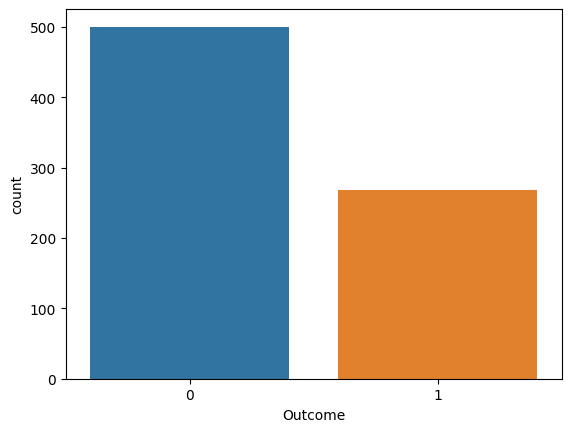

In [13]:
sns.countplot(x='Outcome', data=diabetes_data)

<ipython-input-14-d0cbd7b02797>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(int((length+1)/2), 3, j+1)


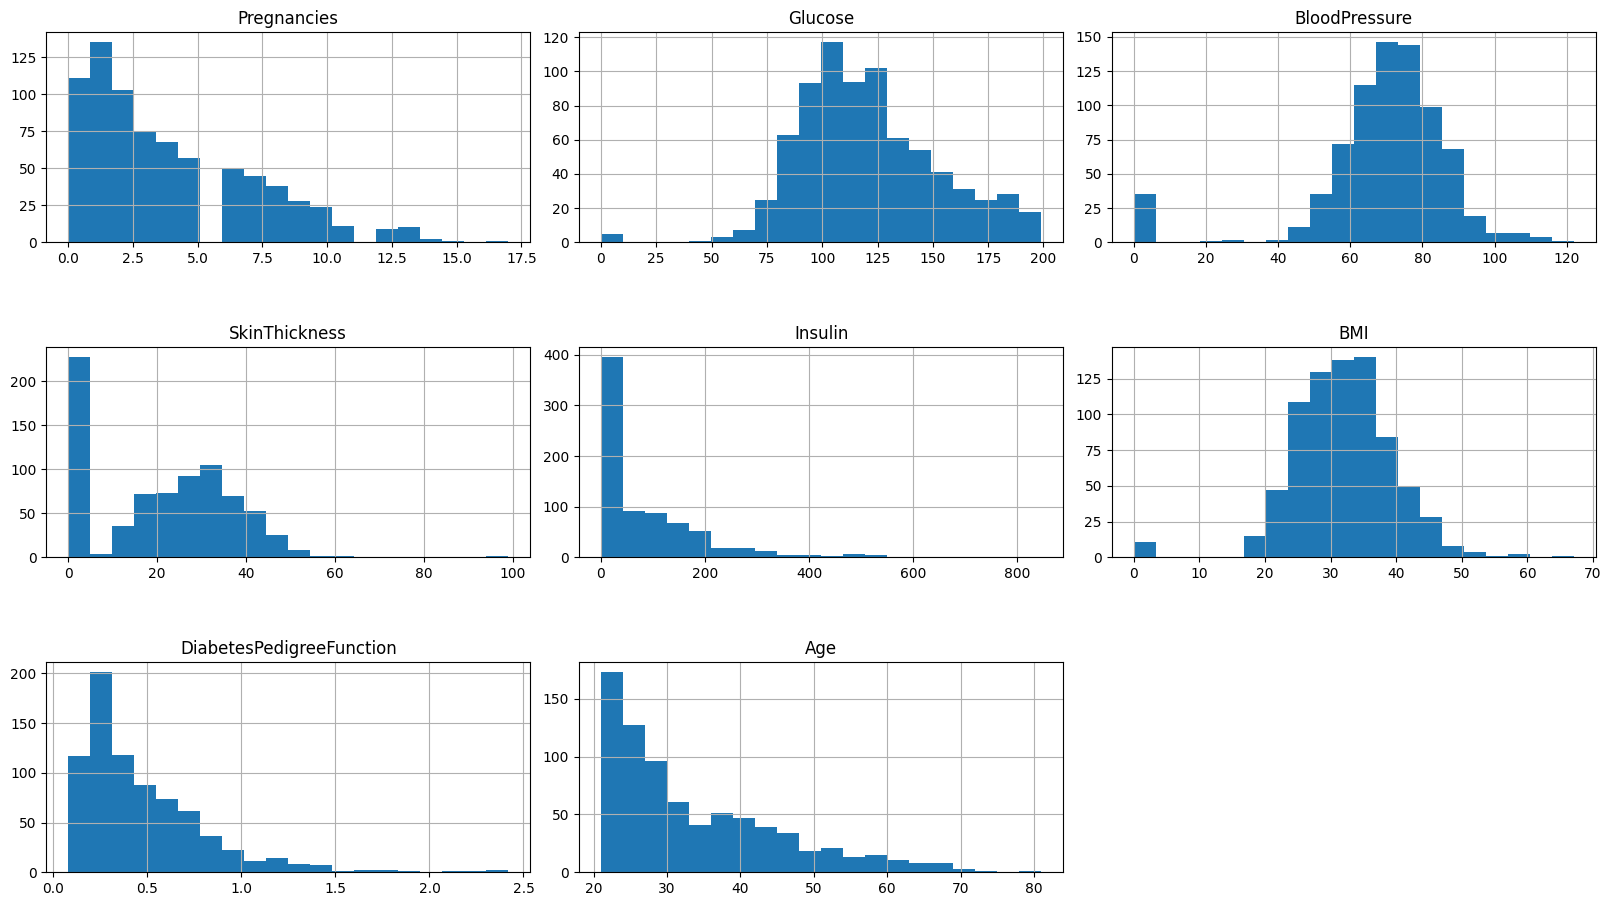

In [14]:
# understanding the underlying distribution of each variable in our diabetes dataset.

col = diabetes_data.columns[:8]
plt.subplots(figsize=(20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(int((length+1)/2), 3, j+1)
    plt.subplots_adjust(wspace=0.1, hspace=0.5)
    diabetes_data[i].hist(bins=20)
    plt.title(i)

plt.show()


Heatmap of the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

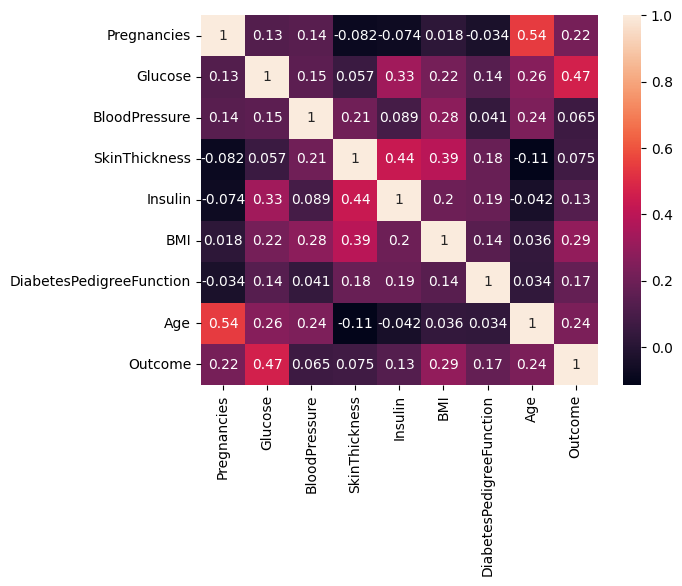

In [15]:
# Checking the correlation between each feature and the target variable
sns.heatmap(diabetes_data.corr(), annot=True)
plt.show

Step3: **Data preprocessing**

**Replacing zero values with NaN**

In [16]:
# Replacing zero values with NaN
# new_diabetesData[["Glucose", "BloodPressure", "SkinThickness", "BMI", "Insulin"]] = new_diabetesData[["Glucose", "BloodPressure", "SkinThickness", "BMI", "Insulin"]].replace(0, np.nan)

In [17]:
# new_diabetesData.isna().sum()

**I believe there is multiple ways of doing this process(replacing zero with NaN values). So, we can try another way and see what are the results**

In [18]:
# Replacing zero values with NaN
new_diabetesData = diabetes_data
cols_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "BMI", "Insulin"]
new_diabetesData[cols_to_replace] = new_diabetesData[cols_to_replace].astype(float)
new_diabetesData[cols_to_replace] = new_diabetesData[cols_to_replace].replace(0, np.nan)


In [19]:
new_diabetesData.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**Replacing NaN values with mean**

In [20]:
# replace all NaN values with the mean of the corresponding column
new_diabetesData.fillna(new_diabetesData.mean(), inplace=True)

In [21]:
new_diabetesData.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Statistical Summary of data preprocessing**

In [22]:
new_diabetesData.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


**Features scaling with min-max scaling and/or standardization using scikit-learn's MinMaxScaler and StandardScaler classes**

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [24]:
# # Instantiate the MinMaxScaler object
# scaler_minmax = MinMaxScaler(feature_range=(0, 1))

# # Perform min-max scaling on the diabetes dataset
# new_diabetesData_scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(new_diabetesData), columns=new_diabetesData.columns)

# # Select the input features and target variable for building a machine learning model
# X = new_diabetesData_scaled_minmax.iloc[:, [1, 2, 4, 5, 7]].values
# Y = new_diabetesData_scaled_minmax.iloc[:, 8].values

In [25]:
# new_diabetesData_scaled_minmax.describe().T

**Tried MinMax scaler with feature range to see how it goes but it works pretty much the same with the standard scaler and lead to the same results so we gonna leave this up here for the moment**

Let's scale with standard scaler

In [26]:
# separate the features and target variable
X_data = new_diabetesData.drop(columns=['Outcome'])
Y_data = new_diabetesData['Outcome']

# perform standardization
scaler_std = StandardScaler()

# perform standard scaling on features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

# create a new dataframe for the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X_data.columns)

# combine the scaled features and target variable
diabetes_data_scaled = pd.concat([X_scaled_df, Y_data], axis=1)

In [27]:
# For now we will be using the standardized data instead of minMax
print(diabetes_data_scaled.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
0     0.639947  0.865108      -0.033518   6.655021e-01 -3.345079e-16   
1    -0.844885 -1.206162      -0.529859  -1.746338e-02 -3.345079e-16   
2     1.233880  2.015813      -0.695306   8.087936e-16 -3.345079e-16   
3    -0.844885 -1.074652      -0.529859  -7.004289e-01 -7.243887e-01   
4    -1.141852  0.503458      -2.680669   6.655021e-01  1.465506e-01   

        BMI  DiabetesPedigreeFunction       Age  Outcome  
0  0.166292                  0.468492  1.425995        1  
1 -0.852531                 -0.365061 -0.190672        0  
2 -1.332833                  0.604397 -0.105584        1  
3 -0.634212                 -0.920763 -1.041549        0  
4  1.548980                  5.484909 -0.020496        1  


In [28]:
diabetes_data_scaled['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Feature selecting**

**We wanted to try this way to select our features but seems like its not taking us any where so we will just leave it here for the meantime**

In [29]:
# # threshold = 0.01
# # threshold = 0.1
# # threshold = 0.2
# threshold = 0.02

# # calculate the correlation matrix
# corr_matrix = new_diabetesData_scaled_std.corrwith(new_diabetesData['Outcome'])

# # select the most relevant features based on the absolute correlation values
# relevant_features = corr_matrix.abs()[corr_matrix.abs() > threshold].index.tolist()[1:]

# # print the most relevant features
# print(relevant_features)

**Features Selecting('Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age')**

In [30]:
# # Preparing the input features (X) and output/target variable (Y) for building a machine learning model
X= diabetes_data_scaled.iloc[:, [1, 2, 4, 5, 7]].values
Y= diabetes_data_scaled.iloc[:, 8].values

Train Test Split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42,  stratify=new_diabetesData['Outcome'])

***Dimension check***

In [32]:
# Checking dimensions
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(768, 5) (614, 5) (154, 5)
(768,) (614,) (154,)


**Step3: Data Modeling**

In [33]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, Y_train)

LogisticRegression(random_state=42)

**Model prediction**

In [34]:
Y_prediction = lr.predict(X_test)

**Model Evaluation**

**Classification Report of the lr model**

Keep in mind that 0 represents non-diabetic while 1 represents diabetic

In [35]:
print(classification_report(Y_test, Y_prediction))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       100
           1       0.60      0.52      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [36]:
# calculate accuracy score of the model using LogisticRegression
lr_accurScore = round(accuracy_score(Y_test, Y_prediction)*100, 2)
print("Accuracy score using LR is:", str(lr_accurScore), "%")
print('Precision score: %.3f' % precision_score(Y_test, Y_prediction))
print('Recall score: %.3f' % recall_score(Y_test, Y_prediction))
print('F1 score: %.3f' % f1_score(Y_test, Y_prediction))

Accuracy score using LR is: 70.78 %
Precision score: 0.596
Recall score: 0.519
F1 score: 0.554


**Confusion Matrix**

In [37]:
confMatrix = confusion_matrix(Y_test, Y_prediction)
print(confMatrix)

[[81 19]
 [26 28]]


**Heatmap of the confusion matrix**

<function matplotlib.pyplot.show(close=None, block=None)>

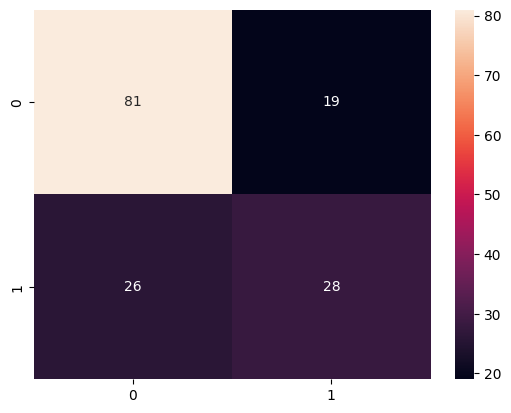

In [38]:
sns.heatmap(pd.DataFrame(confMatrix), annot=True)
plt.show

**Graph for n-neigbors**

<ipython-input-39-c06d4f38d0e3>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  accur = pd.Series()
<ipython-input-39-c06d4f38d0e3>:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accur = accur.append(pd.Series(accuracy))
<ipython-input-39-c06d4f38d0e3>:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accur = accur.append(pd.Series(accuracy))
<ipython-input-39-c06d4f38d0e3>:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accur = accur.append(pd.Series(accuracy))
<ipython-input-39-c06d4f38d0e3>:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future versio

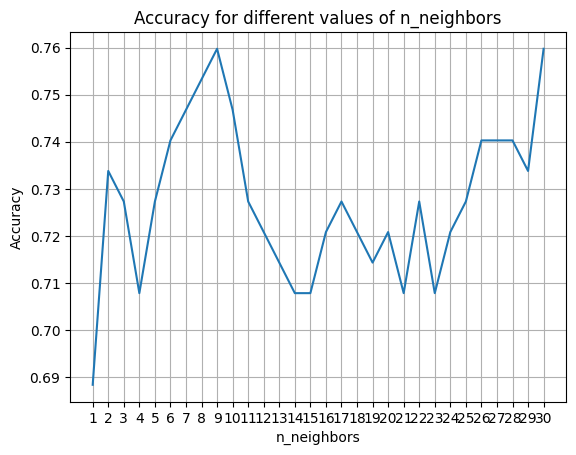

Highest Value: 0.7597402597402597


In [39]:
X_axis = list(range(1, 31))
accur = pd.Series()
x = range(1, 31)

for n in X_axis:
    # instantiate the KNeighborsClassifier model with n_neighbors = n
    knn = KNeighborsClassifier(n_neighbors=n)
    # fit the model on the training data
    knn.fit(X_train, Y_train)
    # predict the target variable on the testing data
    Y_pred = knn.predict(X_test)
    # calculate the accuracy score
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    # add the accuracy score to the accur Series
    accur = accur.append(pd.Series(accuracy))

# plot the accuracies for different values of n_neighbors
plt.plot(X_axis, accur)
plt.xticks(x)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy for different values of n_neighbors')
plt.grid()
plt.show()

print('Highest Value:', accur.values.max())

**Nearest neigbors Algorithm**

In [40]:
k = 24
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy for k neighbor={k}: {acc:.4f}")

Accuracy for k neighbor=24: 0.7597


**Knn model Prediction**

In [41]:
Knn_y_pred = knn.predict(X_test)

**Model Evaluation**

**classification report of KNN model**

In [42]:
print(classification_report(Y_test, Knn_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.61      0.57      0.59        54

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



In [43]:
# calculate accuracy score of the model using KNN
knn_accurScore = round(accuracy_score(Y_test, Knn_y_pred)*100, 2)
print("Accuracy score using LR is:", str(knn_accurScore), "%")
print('Precision score: %.3f' % precision_score(Y_test, Knn_y_pred))
print('Recall score: %.3f' % recall_score(Y_test, Knn_y_pred))
print('F1 score: %.3f' % f1_score(Y_test, Knn_y_pred))

Accuracy score using LR is: 72.08 %
Precision score: 0.608
Recall score: 0.574
F1 score: 0.590


**Confusion Matrix for KNN Model**

In [44]:
confMatrix = confusion_matrix(Y_test, Knn_y_pred)
print(confMatrix)

[[80 20]
 [23 31]]


Heatmap for confusion matrix of KNN Model

<function matplotlib.pyplot.show(close=None, block=None)>

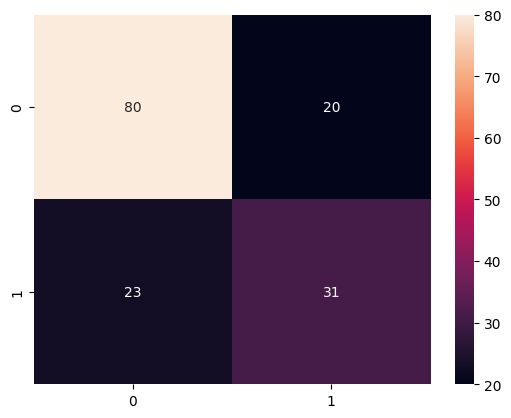

In [45]:
sns.heatmap(pd.DataFrame(confMatrix), annot=True)
plt.show

**Support Vector Classifier Algorithm (kernel='linear')**

In [46]:
# Build a linear SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

**Linear SVC Prediction**

In [47]:
svm_y_pred = svm_classifier.predict(X_test)

**Model Evaluation**

**Linear SVC Classification Report**

In [48]:
print(classification_report(Y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.63      0.50      0.56        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



In [49]:
# calculate accuracy score of the model using svc
svc_accurScore = round(accuracy_score(Y_test, svm_y_pred)*100, 2)
print("Accuracy score using LR is:", str(svc_accurScore), "%")
print('Precision score: %.3f' % precision_score(Y_test, svm_y_pred))
print('Recall score: %.3f' % recall_score(Y_test, svm_y_pred))
print('F1 score: %.3f' % f1_score(Y_test, svm_y_pred))

Accuracy score using LR is: 72.08 %
Precision score: 0.628
Recall score: 0.500
F1 score: 0.557


In [50]:
confMatrix = confusion_matrix(Y_test, svm_y_pred)
print(confMatrix)

[[84 16]
 [27 27]]


<function matplotlib.pyplot.show(close=None, block=None)>

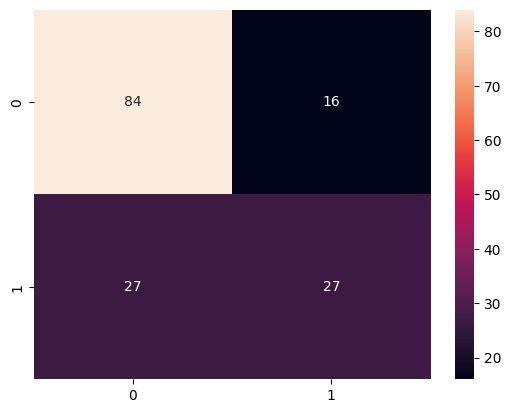

In [51]:
sns.heatmap(pd.DataFrame(confMatrix), annot=True)
plt.show

In [52]:
# Build a polynomial SVM classifier
poly_classifier = SVC(kernel='poly', random_state=42)
poly_classifier.fit(X_train, Y_train)

SVC(kernel='poly', random_state=42)

**Polynomial SVC Prediction**

In [53]:
poly_y_pred = poly_classifier.predict(X_test)

**Model Evaluation**

**Poly SVC Classification Report**

In [54]:
print(classification_report(Y_test, poly_y_pred))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       100
           1       0.68      0.28      0.39        54

    accuracy                           0.70       154
   macro avg       0.69      0.60      0.60       154
weighted avg       0.70      0.70      0.66       154



In [55]:
# calculate accuracy score of the model using poly
poly_accurScore = round(accuracy_score(Y_test, poly_y_pred)*100, 2)
print("Accuracy score using LR is:", str(poly_accurScore), "%")
print('Precision score: %.3f' % precision_score(Y_test, poly_y_pred))
print('Recall score: %.3f' % recall_score(Y_test, poly_y_pred))
print('F1 score: %.3f' % f1_score(Y_test, poly_y_pred))

Accuracy score using LR is: 70.13 %
Precision score: 0.682
Recall score: 0.278
F1 score: 0.395


In [56]:
confMatrix = confusion_matrix(Y_test, poly_y_pred)
print(confMatrix)

[[93  7]
 [39 15]]


<function matplotlib.pyplot.show(close=None, block=None)>

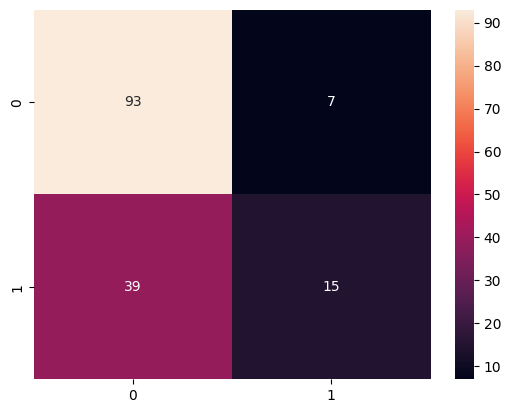

In [57]:
sns.heatmap(pd.DataFrame(confMatrix), annot=True)
plt.show

**Support Vector Classifier Algorithm (kernel='gaussian')**

In [58]:
svm_gaus = SVC(kernel='rbf', random_state=42)
svm_gaus.fit(X_train, Y_train)

SVC(random_state=42)

In [59]:
# prediction
svm_gaus_y_pred = svm_gaus.predict(X_test)

**Model Evaluation**

In [60]:
# classification_report for SVC (kernel=gaussian)
print(classification_report(Y_test, svm_gaus_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       100
           1       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



In [61]:
# calculate accuracy score of the model using gaussian
gaus_accurScore = round(accuracy_score(Y_test, svm_gaus_y_pred)*100, 2)
print("Accuracy score using gaussian is:", str(gaus_accurScore), "%")
print('Precision score: %.3f' % precision_score(Y_test, svm_gaus_y_pred))
print('Recall score: %.3f' % recall_score(Y_test, svm_gaus_y_pred))
print('F1 score: %.3f' % f1_score(Y_test, svm_gaus_y_pred))

Accuracy score using gaussian is: 74.68 %
Precision score: 0.667
Recall score: 0.556
F1 score: 0.606


In [62]:
confMatrix = confusion_matrix(Y_test, svm_gaus_y_pred)
print(confMatrix)

[[85 15]
 [24 30]]


<function matplotlib.pyplot.show(close=None, block=None)>

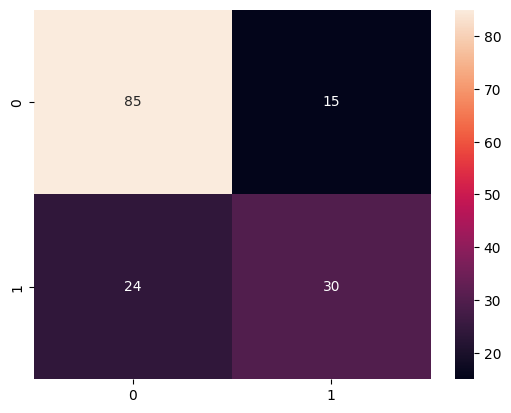

In [63]:
sns.heatmap(pd.DataFrame(confMatrix), annot=True)
plt.show

**Support Vector Classifier Algorithm (kernel='sigmoid')**

In [64]:
svm_sigm = SVC(kernel='sigmoid', random_state=42)
svm_sigm.fit(X_train, Y_train)

SVC(kernel='sigmoid', random_state=42)

In [65]:
# prediction
svm_sigm_y_pred = svm_sigm.predict(X_test)

In [66]:
# classification_report for SVC (kernel=sigmoid)
print(classification_report(Y_test, svm_sigm_y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       100
           1       0.51      0.52      0.51        54

    accuracy                           0.66       154
   macro avg       0.62      0.62      0.62       154
weighted avg       0.66      0.66      0.66       154



**Model Evaluation**

In [67]:
# calculate accuracy score of the model using sigmoid
sgm_accurScore = round(accuracy_score(Y_test, svm_sigm_y_pred)*100, 2)
print("Accuracy score using sigmoid is:", str(sgm_accurScore), "%")
print('Precision score: %.3f' % precision_score(Y_test, svm_sigm_y_pred))
print('Recall score: %.3f' % recall_score(Y_test, svm_sigm_y_pred))
print('F1 score: %.3f' % f1_score(Y_test, svm_sigm_y_pred))

Accuracy score using sigmoid is: 65.58 %
Precision score: 0.509
Recall score: 0.519
F1 score: 0.514


In [68]:
confMatrix = confusion_matrix(Y_test, svm_gaus_y_pred)
print(confMatrix)

[[85 15]
 [24 30]]


<function matplotlib.pyplot.show(close=None, block=None)>

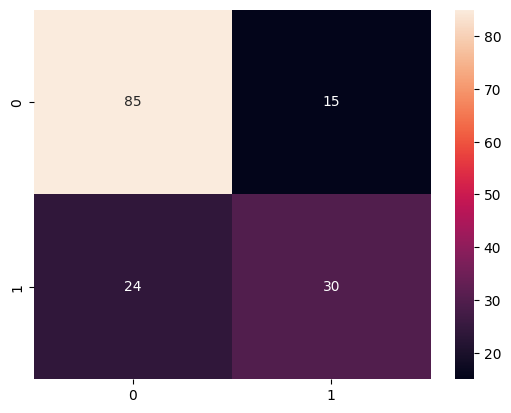

In [69]:
sns.heatmap(pd.DataFrame(confMatrix), annot=True)
plt.show

#Decision Tree Algorithm

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [71]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [72]:
dtree_y_pred = dtree.predict(X_test)

In [73]:
# classification_report for Decision tree
print(classification_report(Y_test, dtree_y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       100
           1       0.59      0.56      0.57        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.71       154



In [74]:
# calculate accuracy score of the model using decision tree
dtree_accurScore = round(accuracy_score(Y_test, dtree_y_pred)*100, 2)
print("Accuracy score using dtree is:", str(dtree_accurScore), "%")
print('Precision score: %.3f' % precision_score(Y_test, dtree_y_pred))
print('Recall score: %.3f' % recall_score(Y_test, dtree_y_pred))
print('F1 score: %.3f' % f1_score(Y_test, dtree_y_pred))

Accuracy score using dtree is: 70.78 %
Precision score: 0.588
Recall score: 0.556
F1 score: 0.571


In [75]:
confMatrix = confusion_matrix(Y_test, dtree_y_pred)
print(confMatrix)

[[79 21]
 [24 30]]


<function matplotlib.pyplot.show(close=None, block=None)>

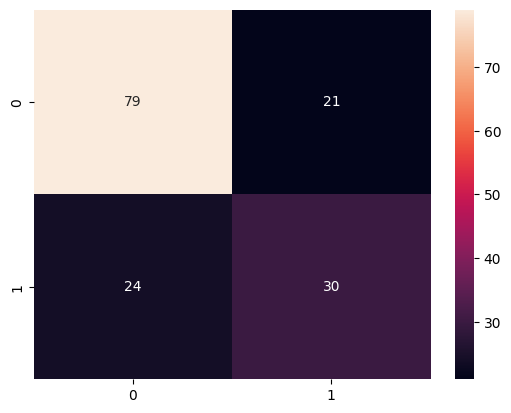

In [76]:
sns.heatmap(pd.DataFrame(confMatrix), annot=True)
plt.show

#Random Forest Algorithm

In [77]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier (n_estimators = 11, criterion = 'entropy', random_state=42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [78]:
ranfor_y_pred = ranfor.predict(X_test)

In [79]:
# calculate accuracy score of the model using random forest
ranfor_accurScore = round(accuracy_score(Y_test, ranfor_y_pred)*100, 2)
print("Accuracy score using ranfor is:", str(ranfor_accurScore), "%")
print('Precision score: %.3f' % precision_score(Y_test, ranfor_y_pred))
print('Recall score: %.3f' % recall_score(Y_test, ranfor_y_pred))
print('F1 score: %.3f' % f1_score(Y_test, ranfor_y_pred))

Accuracy score using ranfor is: 75.32 %
Precision score: 0.667
Recall score: 0.593
F1 score: 0.627


In [80]:
confMatrix = confusion_matrix(Y_test, ranfor_y_pred)
print(confMatrix)

[[84 16]
 [22 32]]


<function matplotlib.pyplot.show(close=None, block=None)>

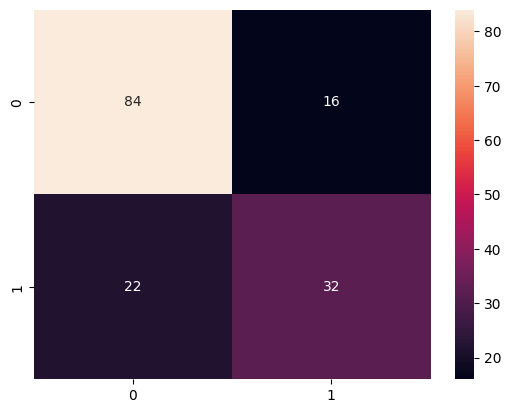

In [81]:
sns.heatmap(pd.DataFrame(confMatrix), annot=True)
plt.show

#Training an XGBoost model for prediction

In [82]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Define the XGBoost model
model = xgb.XGBRegressor(n_estimators=50, max_depth=6, learning_rate=0.1, objective='reg:squarederror')

# Train the model on the training data
model.fit(X_train, Y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error (MAE) of the predictions
mae = mean_absolute_error(Y_test, y_pred)
print('MAE:', mae)

#also do rsme
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print('RMSE:', rmse)

MAE: 0.294500253044028
RMSE: 0.41640049420851655


**Optimazing the model**

In [83]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Define the XGBoost model
model = xgb.XGBRegressor(n_estimators=11, max_depth=8, learning_rate=0.1, objective='reg:squarederror')

# Train the model on the training data
model.fit(X_train, Y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error (MAE) of the predictions
mae = mean_absolute_error(Y_test, y_pred)
print('MAE:', mae)

#also do rsme
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print('RMSE:', rmse)

MAE: 0.3339130467215142
RMSE: 0.4060453114226467


In [84]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Define the XGBoost model
model = xgb.XGBRegressor(n_estimators=5, max_depth=3, learning_rate=0.1, objective='reg:squarederror')

# Train the model on the training data
model.fit(X_train, Y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error (MAE) of the predictions
mae = mean_absolute_error(Y_test, y_pred)
print('MAE:', mae)

#also do rsme
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print('RMSE:', rmse)

MAE: 0.4019268054466743
RMSE: 0.4327273622162839


**Considering how small the true negative and true positive are, we are going to resample the data**

In [85]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_resampled, Y_resampled = smote_enn.fit_resample(X, Y)
x_train, x_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

**Training the model on a resampled dataset(linear svcc)**

In [86]:
# Build a linear SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [87]:
y_pred = svm_classifier.predict(x_test)

**Classification report**

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        58
           1       0.82      0.91      0.86        55

    accuracy                           0.86       113
   macro avg       0.86      0.86      0.86       113
weighted avg       0.86      0.86      0.86       113



In [89]:
# calculate accuracy score of the model using svc
svc_accurScore = round(accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score using svc is:", str(lr_accurScore), "%")
print('Precision score: %.3f' % precision_score(y_test, y_pred))
print('Recall score: %.3f' % recall_score(y_test, y_pred))
print('F1 score: %.3f' % f1_score(y_test, y_pred))

Accuracy score using svc is: 70.78 %
Precision score: 0.820
Recall score: 0.909
F1 score: 0.862


In [90]:
confMatrix = confusion_matrix(y_test, y_pred)
print(confMatrix)

[[47 11]
 [ 5 50]]


<function matplotlib.pyplot.show(close=None, block=None)>

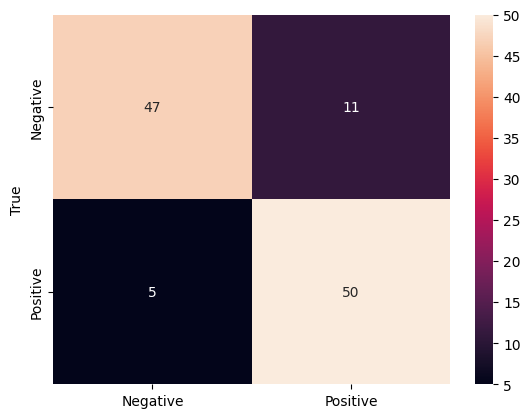

In [91]:
sns.heatmap(pd.DataFrame(confMatrix), annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True')
plt.show

In [92]:
import pickle
pickle.dump(svm_classifier, open('svm_classifier.pkl', 'wb'))
loaded_svm_classifier = pickle.load(open('svm_classifier.pkl', 'rb'))

In [93]:
input_data = (103, 30, 83, 43.3, 33)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_svm_classifier.predict(input_data_reshaped)
if (prediction[0]==0):
  print('You are not diabetic', prediction)
else:
  print('You are diabetic', prediction)

You are diabetic [1]


**Trying LogisticRegression on resampled dataset**

In [94]:
# y_test and y_prediction are arrays of true and predicted labels, respectively
logreModel = LogisticRegression(random_state=42)
logreModel.fit(x_train, y_train)
y_prediction = logreModel.predict(x_test)

**Classification Report of the logistic regression model**

Keep in mind that 0 represents non-diabetic while 1 represents diabetic

In [95]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        58
           1       0.84      0.87      0.86        55

    accuracy                           0.86       113
   macro avg       0.86      0.86      0.86       113
weighted avg       0.86      0.86      0.86       113



In [96]:
# calculate accuracy score of the model using LogisticRegression
lr_accurScore = round(accuracy_score(y_test, y_prediction)*100, 2)
print("Accuracy score using LR is:", str(lr_accurScore), "%")
print('Precision score: %.3f' % precision_score(y_test, y_prediction))
print('Recall score: %.3f' % recall_score(y_test, y_prediction))
print('F1 score: %.3f' % f1_score(y_test, y_prediction))

Accuracy score using LR is: 85.84 %
Precision score: 0.842
Recall score: 0.873
F1 score: 0.857


In [97]:
confMatrix = confusion_matrix(y_test, y_prediction)
print(confMatrix)

[[49  9]
 [ 7 48]]


<function matplotlib.pyplot.show(close=None, block=None)>

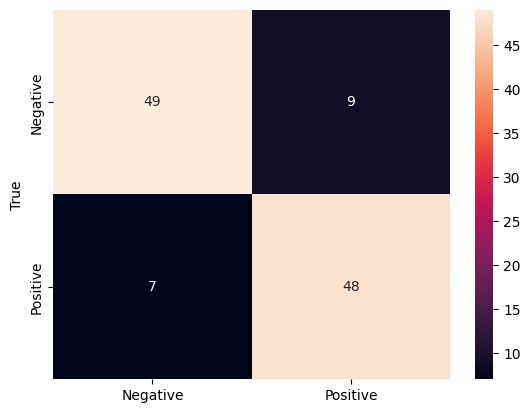

In [98]:
sns.heatmap(pd.DataFrame(confMatrix), annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True')
plt.show

#Use the model/test the model

In [99]:
import pickle
pickle.dump(logreModel, open('logreModel.pkl', 'wb'))

In [100]:
loaded_logreModel = pickle.load(open('logreModel.pkl', 'rb'))

In [101]:
input_data = (85, 72, 50, 25, 50)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [102]:
prediction = loaded_logreModel.predict(input_data_reshaped)
if (prediction[0]==0):
  print('You are not diabetic', prediction)
else:
  print('You are diabetic', prediction)

You are diabetic [1]


#Tried all the above techniques and ended up getting only the positive results

#Let's now train our model with different features to see how it goes

In [103]:
# printing the first 5 rows of the dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [104]:
# number of rows and Columns in this dataset
diabetes_data.shape

(768, 9)

In [105]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [106]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [107]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.768651,142.210761,30.888434,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.736944,180.431548,35.384757,0.550500,37.067164


In [108]:
# separating the data and labels
X_df = diabetes_data.drop(columns = 'Outcome', axis=1)
Y_df = diabetes_data['Outcome']

In [109]:
print(X_df)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [110]:
print(Y_df)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


#Train_test_split the data

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df,Y_df, test_size = 0.2, stratify=Y_df, random_state=2)

In [112]:
print(X.shape, X_train.shape, X_test.shape)

(768, 5) (614, 8) (154, 8)


#Training the model

In [113]:
svm_classifier = svm.SVC(kernel='linear')

In [114]:
#training the support vector Machine Classifier
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear')

#model evaluation

In [115]:
# accuracy score on the training data
X_train_prediction = svm_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [116]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7719869706840391


#Using the model

In [117]:
input_data = (1, 89,	66,	23,	94,	28.1,	0.167, 21)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svm_classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


#Saving the model

In [118]:
import pickle

In [119]:
filename = 'diabetes_model.sav'
pickle.dump(svm_classifier, open(filename, 'wb'))

In [120]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))